In [1]:
from datetime import datetime
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
from iexfinance.stocks import get_historical_data
def get_iex_data(stock_list, start=datetime(2015,1,1), end=datetime(2019,12,31)):
    return_list = []
    for i in stock_list:
        df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
        df['ticker'] = i
        return_list.append(df)
    return return_list

## Import Data

In [3]:
hun_etfs = ['DIA']
data = get_iex_data(hun_etfs)
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  174.74  175.08  172.81  173.06  9293698    DIA
 2015-01-16  172.57  174.97  172.12  174.67  8721910    DIA
 2015-01-20  175.23  175.61  173.14  174.90  7224084    DIA
 2015-01-21  174.25  175.75  173.66  175.35  6259314    DIA
 2015-01-22  175.92  178.14  174.51  177.92  9565123    DIA
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  285.63  285.63  284.87  285.01   611593    DIA
 2019-12-26  285.23  286.10  285.20  286.06   933330    DIA
 2019-12-27  286.83  286.85  285.90  286.33  1930421    DIA
 2019-12-30  286.34  286.41  284.12  284.53  2556317    DIA
 2019-12-31  283.91  285.31  283.56  285.10  1342339    DIA
 
 [1249 rows x 6 columns]]

In [4]:
dia = data[0]
dia.to_csv('dia.csv', encoding='utf-8')

In [5]:
def clean_data(data):
    for i in range(len(data)):
        data[i] = data[i].reset_index()
        data[i]['date'] = pd.to_datetime(data[i]['date'])
        data[i] = data[i].set_index('date')
    return data

In [6]:
data = clean_data(data)

In [7]:
data

[              open    high     low   close   volume ticker
 date                                                      
 2015-01-15  174.74  175.08  172.81  173.06  9293698    DIA
 2015-01-16  172.57  174.97  172.12  174.67  8721910    DIA
 2015-01-20  175.23  175.61  173.14  174.90  7224084    DIA
 2015-01-21  174.25  175.75  173.66  175.35  6259314    DIA
 2015-01-22  175.92  178.14  174.51  177.92  9565123    DIA
 ...            ...     ...     ...     ...      ...    ...
 2019-12-24  285.63  285.63  284.87  285.01   611593    DIA
 2019-12-26  285.23  286.10  285.20  286.06   933330    DIA
 2019-12-27  286.83  286.85  285.90  286.33  1930421    DIA
 2019-12-30  286.34  286.41  284.12  284.53  2556317    DIA
 2019-12-31  283.91  285.31  283.56  285.10  1342339    DIA
 
 [1249 rows x 6 columns]]

In [8]:
ts = data[0]['close']

## ARIMA analysis

In [9]:
# p = d = q = range(0,3)
# pdq = list(itertools.product(p,d,q))
# pdqs = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
# ans = []
# for comb in pdq:
#     for combs in pdqs:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(ts,
#                                             order=comb,
#                                             seasonal_order=combs,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             output = mod.fit()
#             ans.append([comb, combs, output.aic])
#             print('ARIMA {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))
#         except:
#             continue    

In [10]:
# ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
# ans_df.loc[ans_df['aic'].idxmin()]

In [11]:
ARIMA_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(2, 2, 2),
                                seasonal_order=(0, 0, 2, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
output = ARIMA_model.fit()
print(output.summary().tables[1])


C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8837      0.074    -11.914      0.000      -1.029      -0.738
ar.L2         -0.0608      0.018     -3.387      0.001      -0.096      -0.026
ma.L1          0.1494      2.864      0.052      0.958      -5.465       5.764
ma.L2         -1.1494      3.319     -0.346      0.729      -7.655       5.356
ma.S.L5       -0.0624      0.023     -2.771      0.006      -0.107      -0.018
ma.S.L10      -0.0279      0.021     -1.322      0.186      -0.069       0.013
sigma2         2.6015      7.528      0.346      0.730     -12.152      17.355


In [12]:
csv_output = output.summary().tables[1]

summary_df = pd.DataFrame(csv_output, index=None)
# csv_output.to_csv('spy_summary.csv', encoding='utf-8')
# csv_output
summary_df.columns = summary_df.iloc[0]
summary_df = summary_df[1:]

summary_df.to_csv('dia_summary.csv', encoding='utf-8')
summary_df


,,coef,std err,z,P>|z|,[0.025,0.975]
1,ar.L1,-0.8837,0.074,-11.914,0.000,-1.029,-0.738
2,ar.L2,-0.0608,0.018,-3.387,0.001,-0.096,-0.026
3,ma.L1,0.1494,2.864,0.052,0.958,-5.465,5.764
4,ma.L2,-1.1494,3.319,-0.346,0.729,-7.655,5.356
5,ma.S.L5,-0.0624,0.023,-2.771,0.006,-0.107,-0.018
6,ma.S.L10,-0.0279,0.021,-1.322,0.186,-0.069,0.013
7,sigma2,2.6015,7.528,0.346,0.730,-12.152,17.355


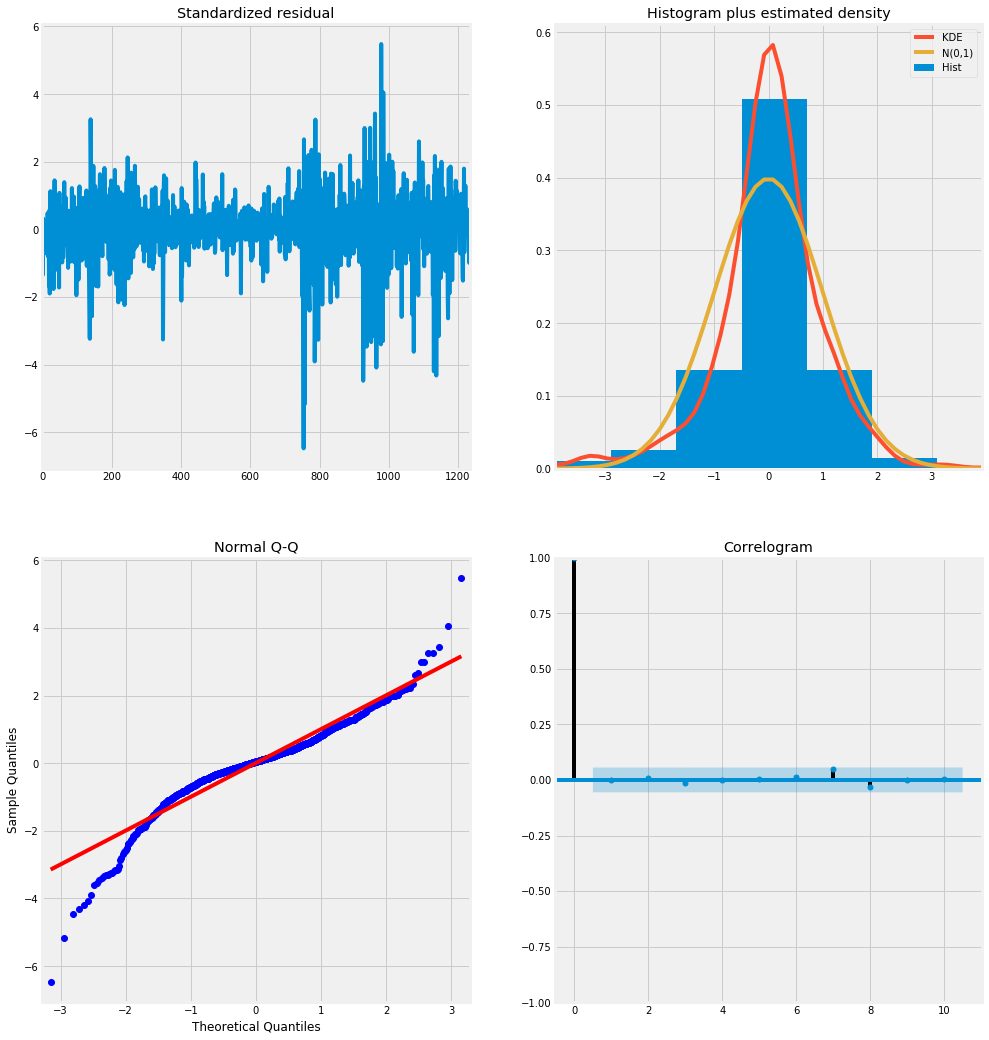

In [13]:
output.plot_diagnostics(figsize=(15, 18))
plt.savefig('diaoutput.png')
plt.show()

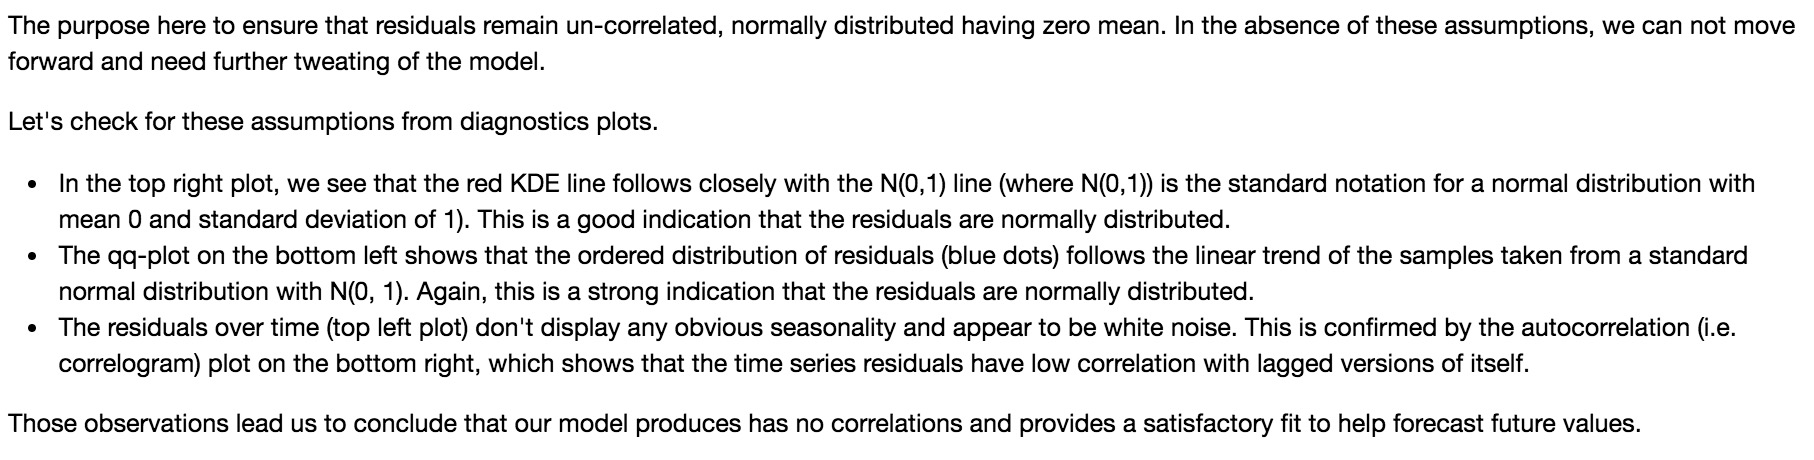

In [31]:
# plt.savefig('arima1.png')

<Figure size 432x288 with 0 Axes>

In [14]:
pred = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=False)
pred_conf = pred.conf_int()

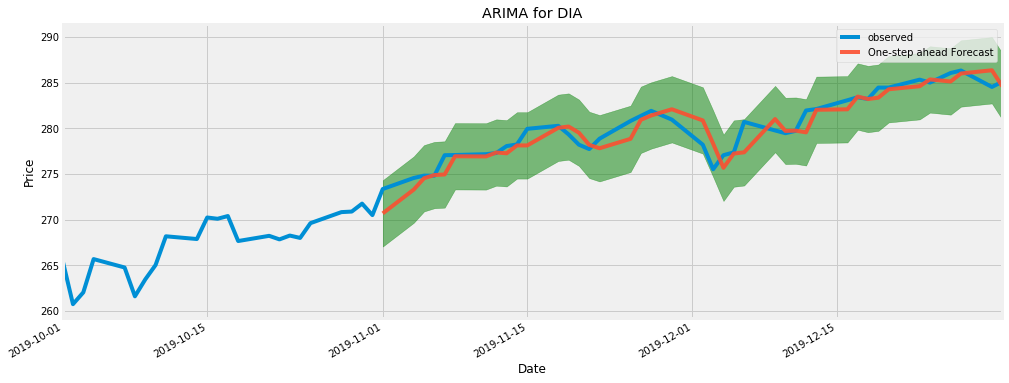

In [23]:
rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = ts['2019-10':].plot(label='observed')

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#Set axes labels
plt.title('ARIMA for DIA')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.savefig('dia_arima.png')
plt.show()

In [17]:
price_forecasted = pred.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.7


In [18]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-11-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

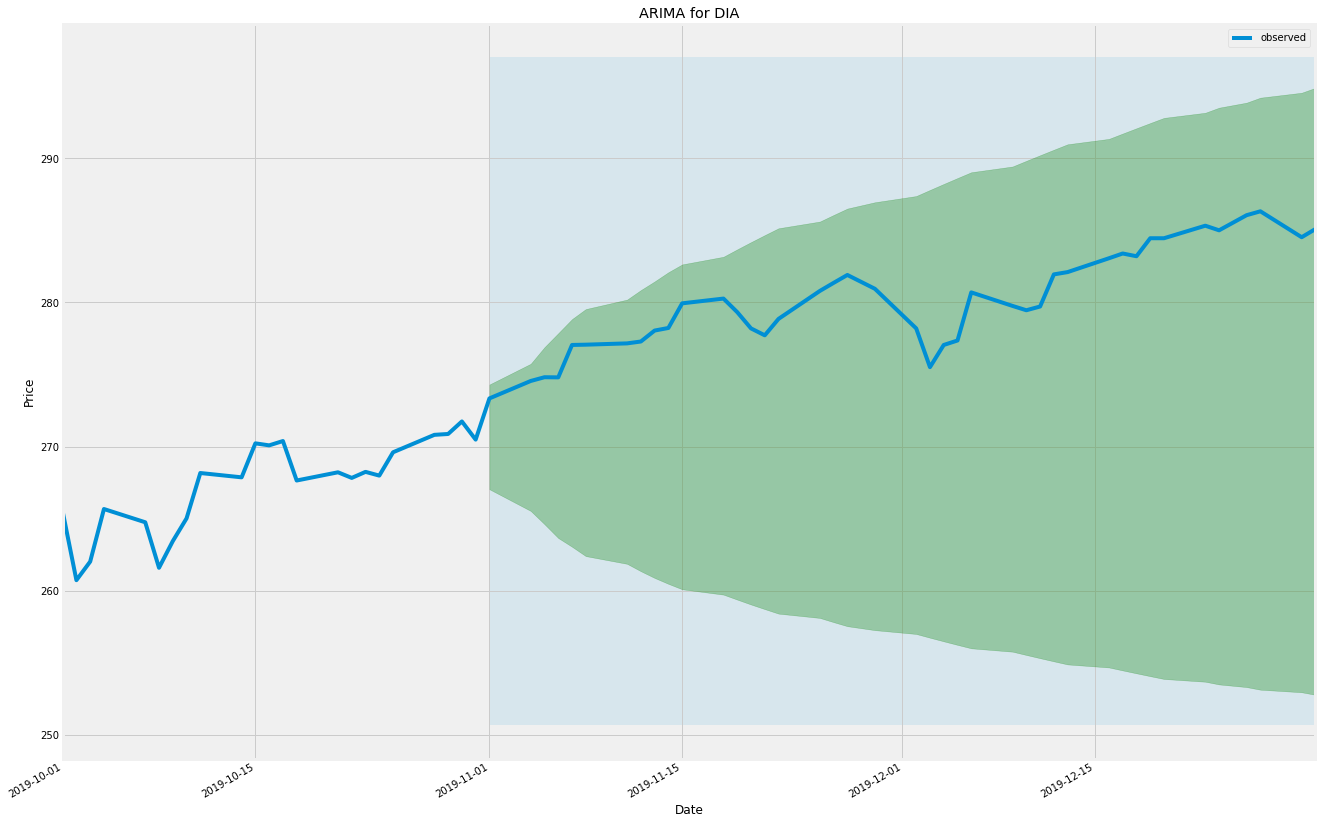

In [24]:
ax = ts['2019-10':].plot(label='observed', figsize=(20, 15))
# datum.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-11-01'), price_forecasted.index[-1], alpha=.1, zorder=-1)

plt.title('ARIMA for DIA')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.savefig('dia_arima2.png')
plt.show()

In [25]:
price_forecasted = pred_dynamic.predicted_mean
price_truth = ts['2019-11-01':]

# Compute the mean square error
mse = ((price_forecasted - price_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 69.56


In [26]:
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


## FBProphet for Future

In [27]:
from fbprophet import Prophet as proph
spy = pd.DataFrame(data[0]['close']).reset_index()
spy.columns = ['ds', 'y']

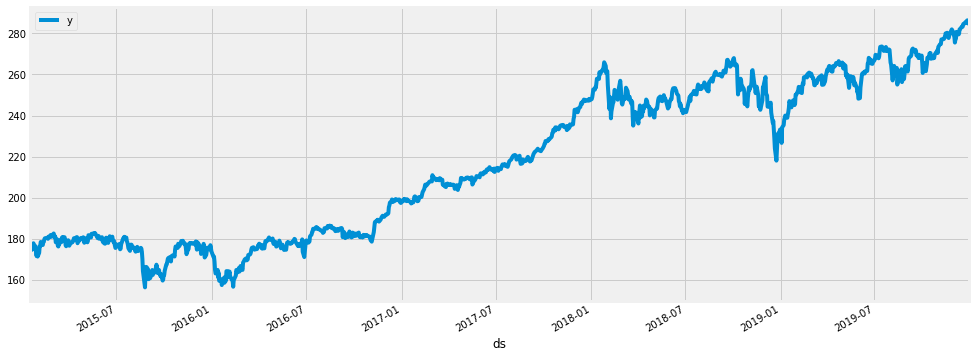

In [28]:
spy.set_index('ds').plot()

In [29]:
p = proph(interval_width=.95)
p.fit(spy)
inp = p.make_future_dataframe(periods=30, freq='D')
out = p.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\jayar\anaconda\Anaconda3\envs\PandaSpace\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [30]:
df = out[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [31]:
# dia_df_novjan = df.tail(71)
dia_df_novjan.dtypes

ds            datetime64[ns]
yhat                 float64
yhat_lower           float64
yhat_upper           float64
dtype: object

In [46]:
# def get_iex_data(stock_list, start=datetime(2019,11,1), end=datetime(2020,1,10)):
#     return_list = []
#     for i in stock_list:
#         df = pd.DataFrame(get_historical_data(i, start, end, output_format='pandas', token='pk_d28c0190de7a4d6da30b3bd2b08487c8'))
#         df['ticker'] = i
#         return_list.append(df)
#     return return_list
# etf = ['VV']
# data = get_iex_data(etf)
# pull = data[0]['close']
# pull_df = pd.DataFrame(pull)

In [49]:
# pull_df

In [32]:
dia_yf = pd.read_csv('DIA_yf.csv')
dia_yf = dia_yf.rename(columns={"Date": "ds"})
dia_yf['ds'] = pd.to_datetime(dia_yf['ds'])

dia_yf.dtypes

ds           datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [33]:
dia_yf1 = dia_yf[['ds','Adj Close']]
dia_yf1

,ds,Adj Close
0,2019-11-01,272.004425
1,2019-11-04,273.208496
2,2019-11-05,273.467255
3,2019-11-06,273.457306
4,2019-11-07,275.696289
5,2019-11-08,275.716217
6,2019-11-11,275.805756
7,2019-11-12,275.935120
8,2019-11-13,276.691376
9,2019-11-14,276.870544


In [41]:
comb = dia_df_novjan.join(dia_yf1.set_index('ds'), on='ds')
# comb = comb.set_index('ds')
comb['difference'] = comb['Adj Close'] - comb['yhat']
comb['difference_pct'] = comb['difference']/comb['Adj Close']
comb['difference_pct'] = comb['difference_pct'].map("{:.2%}".format)
comb.to_csv('vv_predict_fbprophet.csv', encoding='utf-8')
comb = comb.drop([1249])
comb = comb.drop([1252])
comb = comb.drop([1253])
comb = comb.drop([1259])
comb = comb.drop([1260])
comb = comb.drop([1266])
comb = comb.drop([1267])
comb = comb.drop([1268])
comb = comb.drop([1273])
comb = comb.drop([1274])
comb.tail(50)

,ds,yhat,yhat_lower,yhat_upper,Adj Close,difference,difference_pct
1219,2019-11-18,277.604960,268.892986,286.196813,279.416748,1.811788,0.65%
1220,2019-11-19,277.961763,269.710859,286.600813,278.479614,0.517851,0.19%
1221,2019-11-20,278.093831,269.638585,286.825547,277.353058,-0.740773,-0.27%
1222,2019-11-21,278.324628,270.195849,286.917546,276.874512,-1.450116,-0.52%
1223,2019-11-22,278.386660,269.650344,286.901193,278.011047,-0.375613,-0.14%
1224,2019-11-25,278.769881,270.510161,287.038816,279.945129,1.175248,0.42%
1225,2019-11-26,279.173256,270.666342,287.117449,280.503418,1.330162,0.47%
1226,2019-11-27,279.355923,271.135830,287.807429,281.051758,1.695835,0.60%
1227,2019-11-29,279.751044,271.047818,288.075341,280.094696,0.343652,0.12%
1228,2019-12-02,280.248285,271.858193,288.603282,277.353058,-2.895227,-1.04%


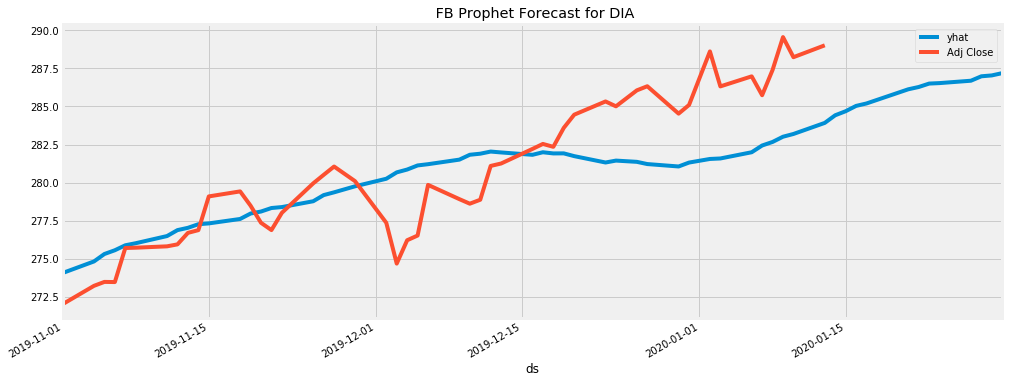

In [42]:
comb.plot(x="ds", y=["yhat", "Adj Close"], kind="line")
plt.title(' FB Prophet Forecast for DIA')
plt.savefig('dia_fbproph_forecast.png')

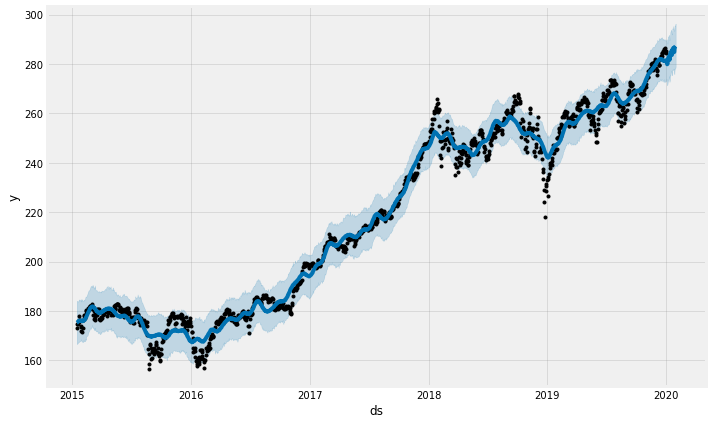

In [43]:
p.plot(df)
plt.savefig('dia_fbp2.png')

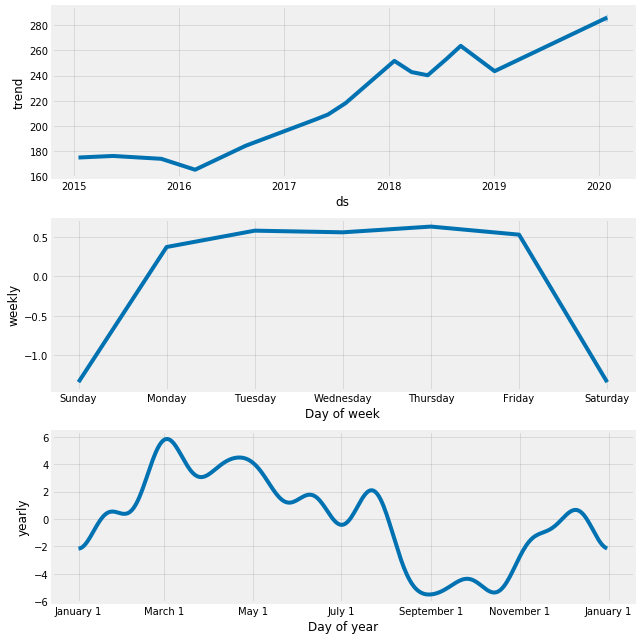

In [45]:
p.plot_components(out)
# plt.title('DIA Seasonality Trends')
plt.savefig('dia_seasonality.png')

In [46]:
split = pd.to_datetime('2019-12-01')
true = spy.set_index('ds')[split:]
past = spy.set_index('ds')[:split].reset_index()

In [47]:
pro = proph(interval_width=.95)
pro.fit(past)
inp = pro.make_future_dataframe(periods=20, freq='D').set_index('ds')[split:].reset_index()
out = pro.predict(inp)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
pred = out[['ds', 'yhat']].set_index('ds')
pred

,yhat
ds,
2019-12-01,277.430064
2019-12-02,280.101092
2019-12-03,280.524935
2019-12-04,280.701169
2019-12-05,280.915744
2019-12-06,280.910087
2019-12-07,278.406976
2019-12-08,278.470785
2019-12-09,280.952559
